## K-Means Clustering

### Setup and Data Preprocessing

In [1]:
import warnings; warnings.filterwarnings('ignore')
import sys; import os; sys.stderr = open(os.devnull, 'w')
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns  # Data processing and visualisation
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.cluster import KMeans  # K-means clustering
from sklearn.metrics import silhouette_score  # Silhouette metric
from sklearn.manifold import TSNE  # To visualise clustering results

In [6]:
import yaml

# Load the environment.yml file
with open("../configs/environment.yml", "r") as f:
    config = yaml.safe_load(f)

# Choose environment (local or aws)
env = "local"   # or "aws"

raw_data_path = config[env]["base_path"] + config[env]["raw_data"]
processed_data_path = config[env]["base_path"] + config[env]["processed_data"]
models_path = config[env]["base_path"] + config[env]["models"]

print("Raw data path:", raw_data_path)
print("Processed data path:", processed_data_path)
print("Models path:", models_path)

Raw data path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/data/raw/
Processed data path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/data/processed/
Models path: /Users/aditikulkarni/Documents/Masters/AI-Projects/04-ML-Models/clustering/models/


In [7]:
df = pd.read_csv(raw_data_path + 'kmeans_census_data.csv', index_col = 'district'); df.sample(3)  # Data loading

,literacy_rate,gender_ratio_f_to_1000m,percent_primary_ed,percent_age_below_29
district,,,,
KARNATAKA - Chikkaballapura,0.62,972,0.18,0.53
HIMACHAL PRADESH - Mandi,0.72,1007,0.16,0.52
RAJASTHAN - Jhunjhunun,0.64,950,0.14,0.61


The data has demographic metrics of districts in India

In [8]:
df.shape  # Data size

(640, 4)

In [9]:
df.info()  # Features

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, JAMMU AND KASHMIR - Kupwara to ANDAMAN AND NICOBAR ISLANDS - South Andaman
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   literacy_rate            640 non-null    float64
 1   gender_ratio_f_to_1000m  640 non-null    int64  
 2   percent_primary_ed       640 non-null    float64
 3   percent_age_below_29     640 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 25.0+ KB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
literacy_rate,640.0,0.624609,0.105328,0.29,0.55,0.62,0.7025,0.89
gender_ratio_f_to_1000m,640.0,945.432812,60.607477,534.00,906.00,949.00,983.0000,1184.00
percent_primary_ed,640.0,0.170031,0.039413,0.06,0.14,0.16,0.1900,0.32
percent_age_below_29,640.0,0.589578,0.055617,0.40,0.55,0.60,0.6300,0.74


We need to rescale all features to the same scale

In [12]:
scaler = StandardScaler(); 
dfs = scaler.fit_transform(df); 
dfs

array([[-1.08896647, -1.82352402, -1.27041128,  1.80700954],
       [-1.65905935, -0.84928534, -1.52433484,  1.44712589],
       [ 0.71632764, -4.21783942, -1.52433484, -1.07205965],
       ...,
       [ 0.62131216, -2.78125018, -0.25471707, -1.4319433 ],
       [ 1.19140503, -0.33739722,  0.76097715, -0.89211783],
       [ 1.66648243, -1.2290733 , -0.76256417, -0.89211783]],
      shape=(640, 4))

Let's look at a simple clustering model with $K=3$

### Simple K-Means Clustering Model

In [13]:
clusters = KMeans(n_clusters = 3, random_state = 0); 
clusters.fit(dfs)  # K = 3

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [14]:
clusters.cluster_centers_  # Centroids

array([[-0.82503458, -0.3220467 , -0.60550775,  0.69803474],
       [ 0.83291868,  0.41936652, -0.09060927, -1.02334178],
       [ 0.227099  , -0.06441365,  1.30664266,  0.3253609 ]])

In [15]:
clusters.labels_  # Cluster labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,

In [16]:
int(np.round(clusters.inertia_, 0))  # Total inertia (WCSS)

1413

In [17]:
# Centroids in original data space
scaler.inverse_transform(clusters.cluster_centers_)
pd.DataFrame(data = scaler.inverse_transform(clusters.cluster_centers_), columns = df.columns).round(2)

,literacy_rate,gender_ratio_f_to_1000m,percent_primary_ed,percent_age_below_29
0,0.54,925.93,0.15,0.63
1,0.71,970.83,0.17,0.53
2,0.65,941.53,0.22,0.61


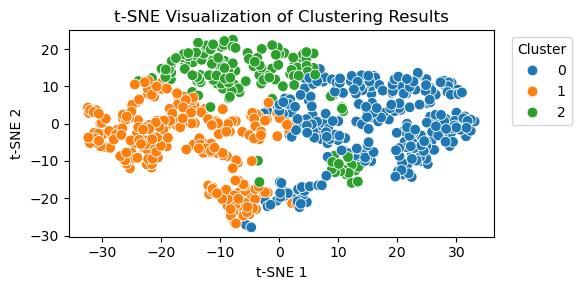

In [19]:
# TSNE for visualisation
tsne = TSNE(n_components = 2, random_state = 42)
tsnes = tsne.fit_transform(dfs)
df_tsne = pd.DataFrame({'TSNE1': tsnes[:, 0], 'TSNE2': tsnes[:, 1], 'Cluster': clusters.labels_})
plt.figure(figsize = (6, 3)); 
sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2', hue = 'Cluster', palette = 'tab10', s = 60); 
plt.title('t-SNE Visualization of Clustering Results'); 
plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2'); 
plt.legend(title = 'Cluster', bbox_to_anchor = (1.2, 1)); 
plt.tight_layout();

Let's try to tune for a good value of $K$

### Optimal Number of Clusters

Let's look at the total $\mathrm{WCSS}$ for different values of $K$ using the elbow method

In [20]:
# Cluster the data for different values of number of clusters and store the inertias of each clustering
inertias = []
for k in np.arange(2, 21, 1):
    clusters = KMeans(n_clusters = k, random_state = 0)
    clusters.fit(dfs)
    inertias.append(clusters.inertia_)
    print('Clustering with {} clusters has total WCSS of {}'.format(k, int(np.round(clusters.inertia_))))

Clustering with 2 clusters has total WCSS of 1720
Clustering with 3 clusters has total WCSS of 1413
Clustering with 4 clusters has total WCSS of 1150
Clustering with 5 clusters has total WCSS of 1028
Clustering with 6 clusters has total WCSS of 936
Clustering with 7 clusters has total WCSS of 849
Clustering with 8 clusters has total WCSS of 808
Clustering with 9 clusters has total WCSS of 744
Clustering with 10 clusters has total WCSS of 710
Clustering with 11 clusters has total WCSS of 666
Clustering with 12 clusters has total WCSS of 638
Clustering with 13 clusters has total WCSS of 615
Clustering with 14 clusters has total WCSS of 589
Clustering with 15 clusters has total WCSS of 562
Clustering with 16 clusters has total WCSS of 542
Clustering with 17 clusters has total WCSS of 517
Clustering with 18 clusters has total WCSS of 498
Clustering with 19 clusters has total WCSS of 471
Clustering with 20 clusters has total WCSS of 457


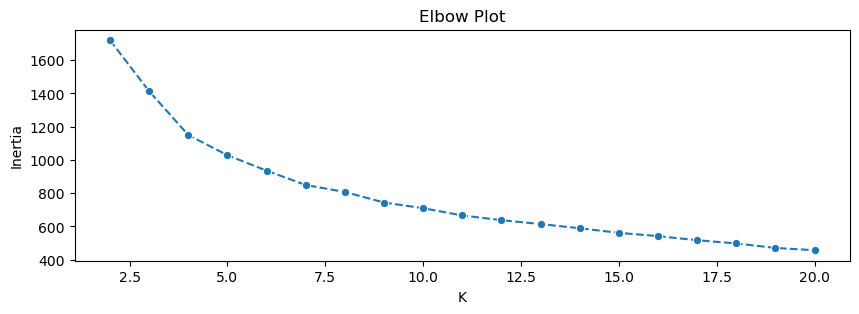

In [21]:
# Use the inertias to plot an elbow curve
plt.figure(figsize = (10, 3)); 
sns.lineplot(x = np.arange(2, 21, 1), y = inertias, linestyle = '--', marker = 'o'); 
plt.xlabel('K'); plt.ylabel('Inertia'); plt.title('Elbow Plot');

There are a couple of suitable values of $K$ based on the elbow curve

In [22]:
clusters = KMeans(n_clusters = 5, random_state = 0); clusters.fit(dfs)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [23]:
clusters.cluster_centers_  # Centroids

array([[-1.06260092, -0.31275812, -0.61765492,  0.96947927],
       [-0.11415117,  0.54999316, -0.08220412, -0.21081138],
       [ 0.33223964,  0.04197093,  1.50553266,  0.14940985],
       [ 1.23689117,  1.13906799,  0.08564855, -1.54871406],
       [ 0.58904275, -1.17299305, -0.53738668, -0.27929708]])

In [24]:
clusters.labels_  # Cluster labels

array([0, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4,
       1, 3, 4, 1, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4, 3, 1, 3, 3, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       0, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 4, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 4, 2, 4, 4, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       2, 0, 4, 0, 0, 0, 4, 2, 4, 4, 4, 4, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2,
       2, 4, 4, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       4, 2, 2, 2, 0, 4, 2, 0, 2, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0,

In [25]:
int(np.round(clusters.inertia_, 0))  # Total inertia (WCSS)

1028

In [26]:
# Centroids in original data space
scaler.inverse_transform(clusters.cluster_centers_)
pd.DataFrame(data = scaler.inverse_transform(clusters.cluster_centers_), columns = df.columns).round(2)

,literacy_rate,gender_ratio_f_to_1000m,percent_primary_ed,percent_age_below_29
0,0.51,926.49,0.15,0.64
1,0.61,978.74,0.17,0.58
2,0.66,947.97,0.23,0.60
3,0.75,1014.41,0.17,0.50
4,0.69,874.40,0.15,0.57


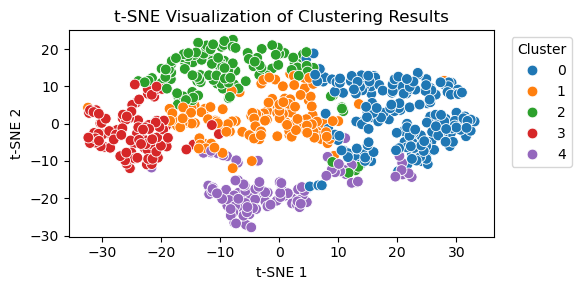

In [27]:
# TSNE for visualisation
df_tsne = pd.DataFrame({'TSNE1': tsnes[:, 0], 'TSNE2': tsnes[:, 1], 'Cluster': clusters.labels_})
plt.figure(figsize = (6, 3)); sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2', hue = 'Cluster', palette = 'tab10', s = 60); plt.title('t-SNE Visualization of Clustering Results'); plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2'); plt.legend(title = 'Cluster', bbox_to_anchor = (1.2, 1)); plt.tight_layout();

Let's also see how different values of $K$ affect the Silhoutte score

In [28]:
# Cluster the data for different values of number of clusters and store the silhouette scores of each clustering
silhouettes = []
for k in np.arange(2, 21, 1):
    clusters = KMeans(n_clusters = k, random_state = 0)
    clusters.fit(dfs)
    silhouettes.append(silhouette_score(dfs, clusters.labels_))
    print('Clustering with {} clusters has total Silhouette score of {}'.format(k, np.round(silhouette_score(dfs, clusters.labels_), 2)))

Clustering with 2 clusters has total Silhouette score of 0.3
Clustering with 3 clusters has total Silhouette score of 0.28
Clustering with 4 clusters has total Silhouette score of 0.28
Clustering with 5 clusters has total Silhouette score of 0.25
Clustering with 6 clusters has total Silhouette score of 0.25
Clustering with 7 clusters has total Silhouette score of 0.23
Clustering with 8 clusters has total Silhouette score of 0.23
Clustering with 9 clusters has total Silhouette score of 0.23
Clustering with 10 clusters has total Silhouette score of 0.21
Clustering with 11 clusters has total Silhouette score of 0.22
Clustering with 12 clusters has total Silhouette score of 0.21
Clustering with 13 clusters has total Silhouette score of 0.21
Clustering with 14 clusters has total Silhouette score of 0.2
Clustering with 15 clusters has total Silhouette score of 0.21
Clustering with 16 clusters has total Silhouette score of 0.21
Clustering with 17 clusters has total Silhouette score of 0.21
Cl

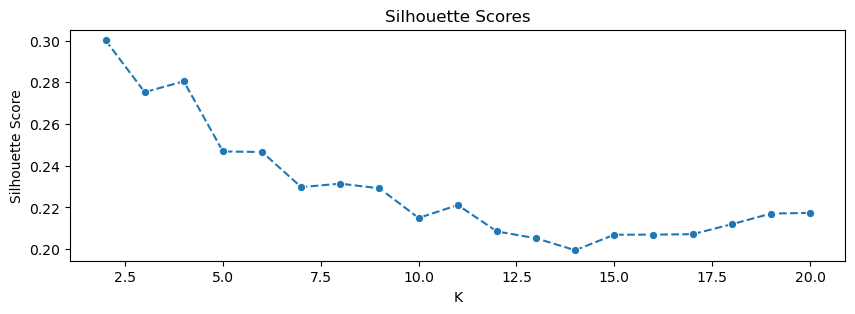

In [29]:
# Use the silhouette scores to plot a silhouette curve
plt.figure(figsize = (10, 3)); 
sns.lineplot(x = np.arange(2, 21, 1), y = silhouettes, linestyle = '--', marker = 'o');
plt.xlabel('K'); plt.ylabel('Silhouette Score'); plt.title('Silhouette Scores');

Let's try and choose a $K$ that shows good performance in both total WCSS and total Silhouette score

In [30]:
clusters = KMeans(n_clusters = 4, random_state = 0); clusters.fit(dfs)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [31]:
clusters.cluster_centers_  # Centroids

array([[-0.93451744, -0.11892911, -0.54625892,  0.80288973],
       [ 0.56017176, -1.12353676, -0.50643259, -0.24902139],
       [ 0.29307687,  0.08192071,  1.39001505,  0.14527406],
       [ 0.82654559,  0.98195312,  0.0499912 , -1.23760613]])

In [32]:
clusters.labels_  # Cluster labels

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       2, 3, 1, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,

In [33]:
# Centroids in original data space
scaler.inverse_transform(clusters.cluster_centers_)
pd.DataFrame(data = scaler.inverse_transform(clusters.cluster_centers_), columns = df.columns).round(2)

,literacy_rate,gender_ratio_f_to_1000m,percent_primary_ed,percent_age_below_29
0,0.53,938.23,0.15,0.63
1,0.68,877.39,0.15,0.58
2,0.66,950.39,0.22,0.60
3,0.71,1004.90,0.17,0.52


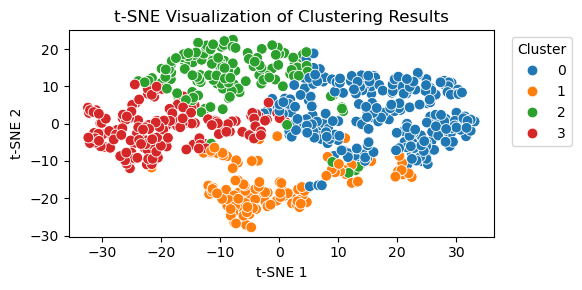

In [34]:
# TSNE for visualisation
df_tsne = pd.DataFrame({'TSNE1': tsnes[:, 0], 'TSNE2': tsnes[:, 1], 'Cluster': clusters.labels_})
plt.figure(figsize = (6, 3)); sns.scatterplot(data = df_tsne, x = 'TSNE1', y = 'TSNE2', hue = 'Cluster', palette = 'tab10', s = 60); plt.title('t-SNE Visualization of Clustering Results'); plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2'); plt.legend(title = 'Cluster', bbox_to_anchor = (1.2, 1)); plt.tight_layout();